In [14]:
import numpy as np
#将X，y赋值给np数组
X=np.array([[0,1,0,1],
           [1,1,1,0],
           [0,1,1,0],
           [0,0,0,1],
           [0,1,1,0],
           [0,1,0,1],
           [1,0,0,1]])
y=np.array([0,1,1,0,1,0,0])
#对不同分类计算每个特征值为1的数量
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
    #打印计数结果
print('feature counts:\n{}'.format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [15]:
#导入贝努力波耶斯
from sklearn.naive_bayes import BernoulliNB
#使用贝叶斯拟合数据
clf=BernoulliNB()
clf.fit(X,y)
#要进行预测的这一天，没有刮北风，也不闷热，但是多云，天气预报说没有下雨
Next_Day=[[0,0,1,0]]
pre=clf.predict(Next_Day)
if pre==[1]:
    print('要下雨了，快收衣服啊！')
else:
    print('放心，又是晴天！')

要下雨了，快收衣服啊！


In [16]:
#假设另一天数据如下
Another_day=[[1,1,0,1]]
#用训练好的模型进行预测
pre2=clf.predict(Another_day)
if pre2==[1]:
    print('要下雨了，快收衣服啊！')
else:
    print('放心，又是晴天！')

放心，又是晴天！


In [17]:
#模型预测分类的概率
print(clf.predict_proba(Next_Day))

[[0.13848881 0.86151119]]


In [18]:
#另外一天模型预测的分类概率
print(clf.predict_proba(Another_day))

[[0.92340878 0.07659122]]


#贝努力朴素贝叶斯-二项分布

In [19]:
#导入数据集生成工具
from sklearn.datasets import make_blobs
#导入手机拆分工具
from sklearn.model_selection import train_test_split
#生成样本数量为500，分类数为5的数据集
X,y=make_blobs(n_samples=500,centers=5,random_state=8)
#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
#使用贝努力贝叶斯拟合数据
nb=BernoulliNB()
nb.fit(X_train,y_train)
#打印模型得分
print('模型得分：{:.3f}'.format(nb.score(X_test,y_test)))

模型得分：0.544


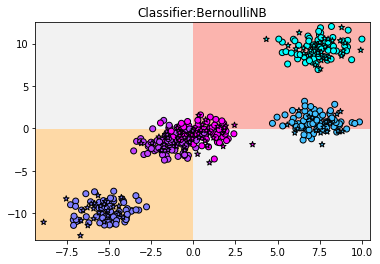

In [23]:
#了解贝努力贝叶斯的工作过程
import matplotlib.pyplot as plt
#限定横轴与纵轴最大值
x_min,x_max=X[:,0].min()-0.5,X[:,0].max()+0.5
y_min,y_max=X[:,1].min()-0.5,X[:,1].max()+0.5
#用不同的背景色表示不同的分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=nb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#将数据集和测试集用散点图表示
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
#定义图题
plt.title('Classifier:BernoulliNB')
plt.show()

#高斯朴素贝叶斯

In [21]:
#导入高斯贝叶斯
from sklearn.naive_bayes import GaussianNB
#使用高斯贝叶斯拟合数据
gnb=GaussianNB()
gnb.fit(X_train,y_train)
#打印模型得分
print('模型得分：{:.3f}'.format(gnb.score(X_test,y_test)))

模型得分：0.968


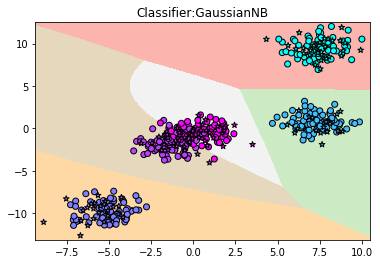

In [32]:
#用不同色块来表示不同的分类
z=gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#用散点图画出训练集和测试集数据
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
# #设定横轴的范围
# plt.xlim(xx.min(),xx.max())
# plt.ylim(yy.min(),yy.max())#这是书上的，但是会报错，下面的是我自己的

plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())

plt.title('Classifier:GaussianNB')
plt.show()

#多项式朴素贝叶斯

In [33]:
#导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
#用多项式朴素贝叶斯拟合数据
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

ValueError: Input X must be non-negative

输入的X值必须是非负数，需要对数据进行一下预处理才行

In [34]:
##导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
#导入数据预处理工具MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#使用MinMaxScaler对数据进行预处理，是数据全部为非负值
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#使用多项式朴素贝叶斯拟合经过预处理之后的数据
mnb=MultinomialNB()
mnb.fit(X_train_scaled,y_train)
print('模型的分：{:.3f}'.format(mnb.score(X_test_scaled,y_test)))

模型的分：0.320


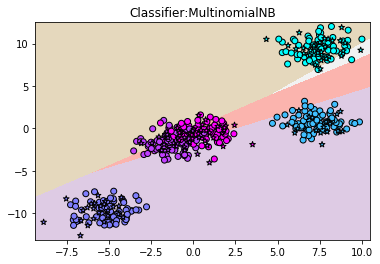

In [36]:
#用不同颜色区分不同的分类
z=mnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#用散点图表示训练集和测试集
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
#设定横轴纵轴范围
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classifier:MultinomialNB')
plt.show()

#朴素贝叶斯实战-判断肿瘤是良性还是恶性

In [37]:
#导入威斯康星乳腺肿瘤数据集
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
#打印数据集键值
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [38]:
#打印数据集中标注好的肿瘤分类
print('肿瘤的分类：',cancer['target_names'])
#打印数据集中的肿瘤特征名称
print('\n肿瘤的特征：\n',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [39]:
#将数据集的数值和分类目标赋值给x和y
X,y=cancer.data,cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=38)
#打印训练集和测试集的数据形态
print('训练集数据形态：',X_train.shape)
print('测试集数据形态',X_test.shape)

训练集数据形态： (426, 30)
测试集数据形态 (143, 30)


In [40]:
#使用高斯朴素贝叶斯拟合数据
gnb=GaussianNB()
gnb.fit(X_train,y_train)
#打印模型评分
print('训练集得分：{:.3f}'.format(gnb.score(X_train,y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test,y_test)))

训练集得分：0.948
测试集得分：0.944


In [41]:
#打印模型预测的分类和真实的分类
print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本的正确分类是：',y[312])

模型预测的分类是：[1]
样本的正确分类是： 1


高斯朴素贝叶斯的学习曲线

In [55]:
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#定义一个函数绘制学习曲线
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
#设定横轴标签
plt.xlabel('Training examples')
    #设定纵轴坐标

plt.ylabel('Score')
train_sizes,train_scores,test_scores=learning_curve(
    estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
train_scores_mean=np.mean(train_socres,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
plt.grid()

plt.plot(train_sizes,train_scores_mean,'o-',color="r",label='Training socre')
plt.plot(train_sizes,test_scores_mean,'o-',color="g",label='Cross-validation score')

plt.legend(loc='lower right')
return plt

title='Learning Curves(Naive Bayes)'
#设定拆分数量
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
#设定模型为高斯朴素贝叶斯
estimator=GaussianNB()
#调用我们定义好的函数
plot_learning_curve(estimator,title,X,y,ylim=(0.9,1.01),cv=cv,n_jobs=4)
plt.show()

UnboundLocalError: local variable 'estimator' referenced before assignment